In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
enem = pd.read_csv("https://raw.githubusercontent.com/gustadavi/Enem/main/enem.csv")
enem = enem.set_index("Unnamed: 0")

# Questões Exploradas no Trabalho

1)O número de computadores em casa tem relação com o desempenho do aluno?

2)Quanto maior a nota do aluno na prova de linguagens e códigos ele terá melhor desempenho na redação? e na competencia 1?

3)A nota do aluno nas provas de linguagens e códigos, na prova de ciencias humanas e redação interferem na sua presença nas demais provas?

4)Entre as dependencias administrativas públicas, qual possui o melhor desempenho?

5)Quanto o grau de estudo dos pais interferem no desempenho do aluno?

##1)O número de computadores em casa tem relação com o desempenho do aluno?

In [ ]:
data = {'Nota': enem["NU_NOTA_CN"], "Materia": "CN", "Numero":enem["Q024"]}
cn = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_CH"], "Materia": "CH", "Numero":enem["Q024"]}
ch = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_LC"], "Materia": "LC", "Numero":enem["Q024"]}
lc = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_MT"], "Materia": "MT", "Numero":enem["Q024"]}
mt = pd.DataFrame(data)

In [ ]:
cn_ch = cn.merge(ch, how = "outer")
cn_ch_lc = cn_ch.merge(lc, how = "outer")
cn_ch_lc_mt = cn_ch_lc.merge(mt, how = "outer", sort = True)
cn_ch_lc_mt = cn_ch_lc_mt.dropna()

Text(0, 0.5, 'Notas')

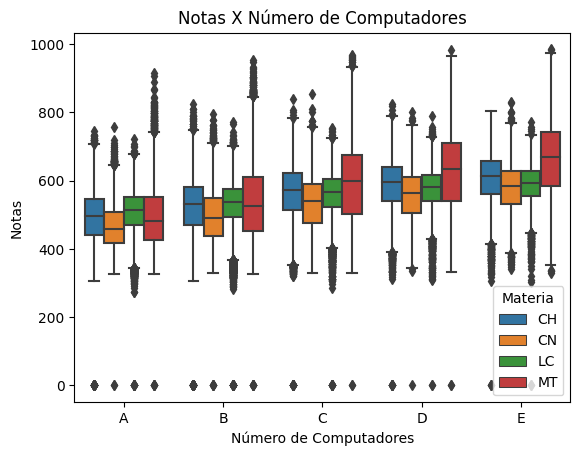

In [ ]:
sns.boxplot(data = cn_ch_lc_mt, x = "Numero", y = "Nota", hue = "Materia")
plt.title("Notas X Número de Computadores")
plt.xlabel("Número de Computadores")
plt.ylabel("Notas")

In [ ]:
cn_ch_lc_mt.groupby(["Numero", "Materia"]).mean()

Nota
Numero Materia            
A      CH       493.459977
       CN       464.542628
       LC       507.256848
       MT       493.873515
B      CH       523.785345
       CN       493.774225
       LC       531.246117
       MT       534.748199
C      CH       563.760372
       CN       533.547919
       LC       558.989364
       MT       593.719952
D      CH       585.729037
       CN       556.937957
       LC       574.542683
       MT       626.014283
E      CH       603.572087
       CN       578.099493
       LC       587.908518
       MT       660.258317

##2)Quanto maior a nota do aluno na prova de linguagens e códigos ele terá melhor desempenho na redação? e na competencia 1?

In [ ]:
notas = enem[["NU_NOTA_LC", "NU_NOTA_COMP1", "NU_NOTA_REDACAO"]]

In [ ]:
notas.corr()[["NU_NOTA_COMP1","NU_NOTA_REDACAO"]]

,NU_NOTA_COMP1,NU_NOTA_REDACAO
NU_NOTA_LC,0.491566,0.530548
NU_NOTA_COMP1,1.000000,0.833493
NU_NOTA_REDACAO,0.833493,1.000000


In [ ]:
notas.corr(method = "spearman")[["NU_NOTA_COMP1","NU_NOTA_REDACAO"]]

,NU_NOTA_COMP1,NU_NOTA_REDACAO
NU_NOTA_LC,0.527288,0.564262
NU_NOTA_COMP1,1.000000,0.765120
NU_NOTA_REDACAO,0.765120,1.000000


Text(0, 0.5, 'Notas Prova de Linguagens e Códigos')

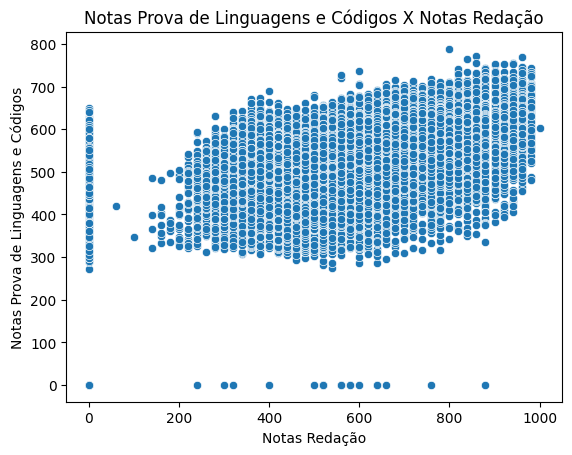

In [ ]:
sns.scatterplot(data = notas, x ="NU_NOTA_REDACAO" , y ="NU_NOTA_LC")
plt.title("Notas Prova de Linguagens e Códigos X Notas Redação")
plt.xlabel("Notas Redação")
plt.ylabel("Notas Prova de Linguagens e Códigos")


Text(0, 0.5, 'Notas Prova de Linguagens e Códigos')

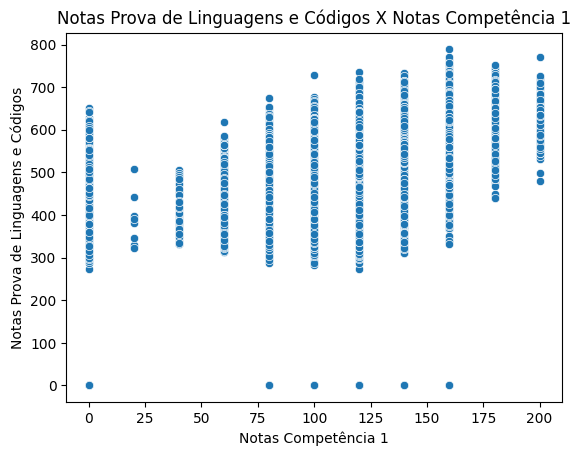

In [ ]:
sns.scatterplot(data = notas, x ="NU_NOTA_COMP1" , y ="NU_NOTA_LC")
plt.title("Notas Prova de Linguagens e Códigos X Notas Competência 1")
plt.xlabel("Notas Competência 1")
plt.ylabel("Notas Prova de Linguagens e Códigos")

##3)A nota do aluno nas provas de linguagens e códigos, na prova de ciencias humanas e redação interferem na sua presença nas demais provas?

In [ ]:
dados = enem[["NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_REDACAO", "TP_PRESENCA_CN", "TP_PRESENCA_MT"]]
dados = dados.dropna()

Text(0, 0.5, 'Notas Prova de Linguagens e Códigos')

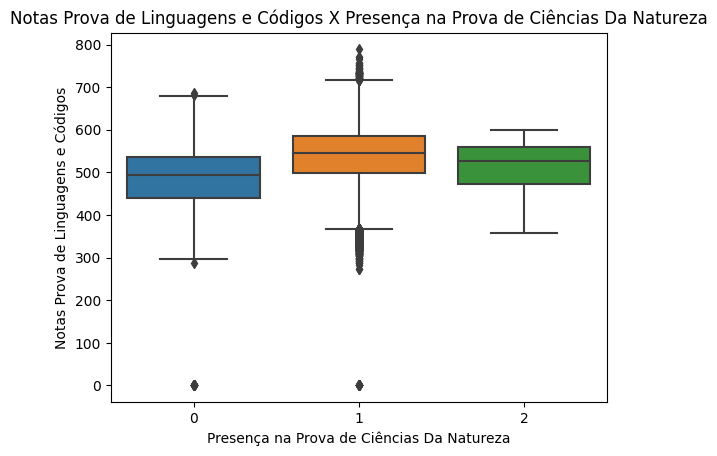

In [ ]:
sns.boxplot(data = dados, x = "TP_PRESENCA_CN", y = "NU_NOTA_LC")
plt.title("Notas Prova de Linguagens e Códigos X Presença na Prova de Ciências Da Natureza")
plt.xlabel("Presença na Prova de Ciências Da Natureza")
plt.ylabel("Notas Prova de Linguagens e Códigos")

Text(0, 0.5, 'Notas Prova de Ciências Humanas')

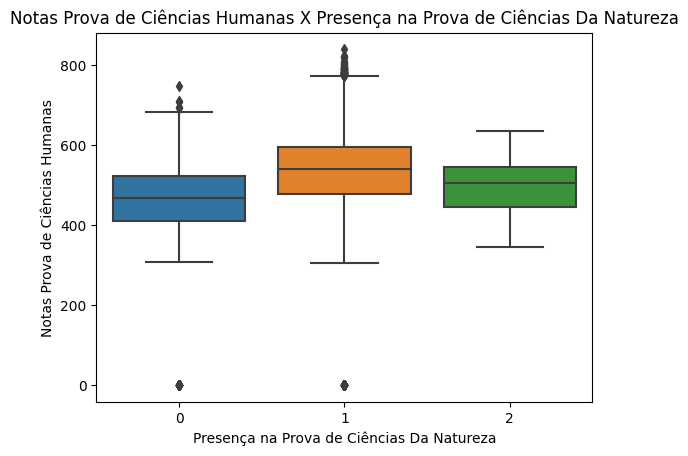

In [ ]:
sns.boxplot(data = dados, x = "TP_PRESENCA_CN", y = "NU_NOTA_CH")
plt.title("Notas Prova de Ciências Humanas X Presença na Prova de Ciências Da Natureza")
plt.xlabel("Presença na Prova de Ciências Da Natureza")
plt.ylabel("Notas Prova de Ciências Humanas")

Text(0, 0.5, 'Notas Prova de Redação')

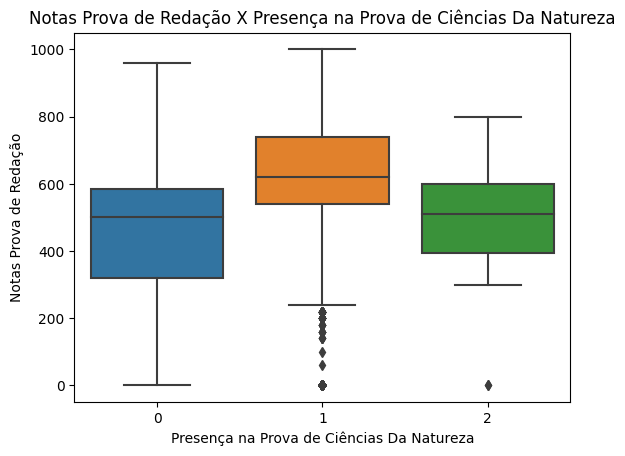

In [ ]:
sns.boxplot(data = dados, x = "TP_PRESENCA_CN", y = "NU_NOTA_REDACAO")
plt.title("Notas Prova de Redação X Presença na Prova de Ciências Da Natureza")
plt.xlabel("Presença na Prova de Ciências Da Natureza")
plt.ylabel("Notas Prova de Redação")

In [ ]:
dados[["NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_REDACAO", "TP_PRESENCA_CN"]].groupby("TP_PRESENCA_CN").mean()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_REDACAO
TP_PRESENCA_CN,,,
0,483.668631,462.948267,425.346620
1,538.930673,535.455666,629.740011
2,509.896875,493.996875,486.875000


##4)Entre as dependencias administrativas, qual possui o melhor desempenho?

In [ ]:
data = {'Nota': enem["NU_NOTA_CN"], "Materia": "CN", "Numero":enem["TP_DEPENDENCIA_ADM_ESC"]}
cn = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_CH"], "Materia": "CH", "Numero":enem["TP_DEPENDENCIA_ADM_ESC"]}
ch = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_LC"], "Materia": "LC", "Numero":enem["TP_DEPENDENCIA_ADM_ESC"]}
lc = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_MT"], "Materia": "MT", "Numero":enem["TP_DEPENDENCIA_ADM_ESC"]}
mt = pd.DataFrame(data)

In [ ]:
cn_ch = cn.merge(ch, how = "outer")
cn_ch_lc = cn_ch.merge(lc, how = "outer")
cn_ch_lc_mt = cn_ch_lc.merge(mt, how = "outer", sort = True)
cn_ch_lc_mt = cn_ch_lc_mt.dropna()

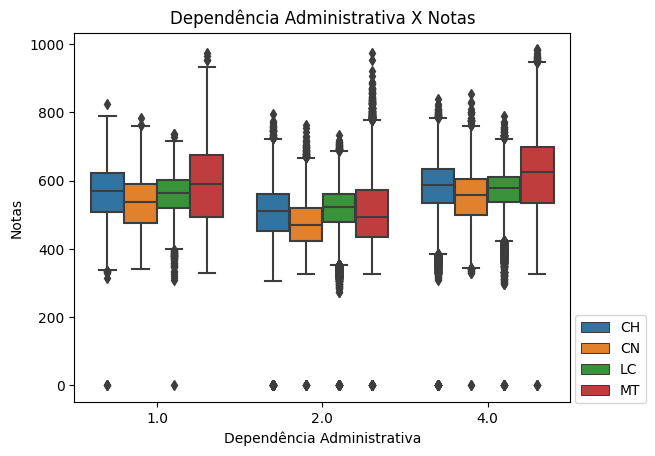

In [ ]:
sns.boxplot(data = cn_ch_lc_mt, x = "Numero", y = "Nota", hue = "Materia")
plt.title("Dependência Administrativa X Notas")
plt.xlabel("Dependência Administrativa")
plt.ylabel("Notas")
plt.legend(bbox_to_anchor=(1.01, 0.235), loc=2, borderaxespad=0.)

In [ ]:
cn_ch_lc_mt.groupby(["Numero", "Materia"]).mean()

Nota
Numero Materia            
1.0    CH       561.806171
       CN       534.546333
       LC       558.076776
       MT       590.694996
2.0    CH       504.533865
       CN       473.478554
       LC       516.514584
       MT       507.158141
4.0    CH       578.555330
       CN       551.602521
       LC       569.900630
       MT       617.700578

##5)Quanto o grau de estudo dos pais interferem no desempenho do aluno?



In [ ]:
# Grau de estudo do pai
data = {'Nota': enem["NU_NOTA_CN"], "Materia": "CN", "Numero":enem["Q001"]}
cn = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_CH"], "Materia": "CH", "Numero":enem["Q001"]}
ch = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_LC"], "Materia": "LC", "Numero":enem["Q001"]}
lc = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_MT"], "Materia": "MT", "Numero":enem["Q001"]}
mt = pd.DataFrame(data)

In [ ]:
cn_ch = cn.merge(ch, how = "outer")
cn_ch_lc = cn_ch.merge(lc, how = "outer")
cn_ch_lc_mt = cn_ch_lc.merge(mt, how = "outer", sort = True)
cn_ch_lc_mt = cn_ch_lc_mt.dropna()

Text(0, 0.5, 'Notas')

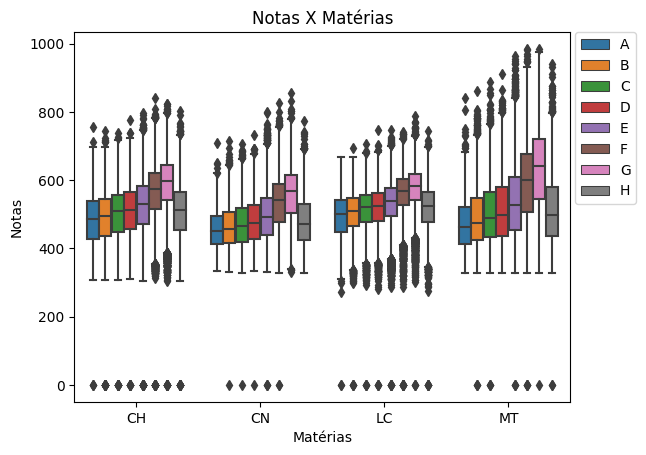

In [ ]:
sns.boxplot(data = cn_ch_lc_mt, x ="Materia" , y = "Nota", hue = "Numero", hue_order = ["A", "B", "C", "D", "E", "F", "G", "H"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title("Notas X Matérias")
plt.xlabel("Matérias")
plt.ylabel("Notas")

In [ ]:
# Grau de estudo da mãe
data = {'Nota': enem["NU_NOTA_CN"], "Materia": "CN", "Numero":enem["Q002"]}
cn = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_CH"], "Materia": "CH", "Numero":enem["Q002"]}
ch = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_LC"], "Materia": "LC", "Numero":enem["Q002"]}
lc = pd.DataFrame(data)
data = {'Nota': enem["NU_NOTA_MT"], "Materia": "MT", "Numero":enem["Q002"]}
mt = pd.DataFrame(data)

In [ ]:
cn_ch = cn.merge(ch, how = "outer")
cn_ch_lc = cn_ch.merge(lc, how = "outer")
cn_ch_lc_mt = cn_ch_lc.merge(mt, how = "outer", sort = True)
cn_ch_lc_mt = cn_ch_lc_mt.dropna()

Text(0, 0.5, 'Notas')

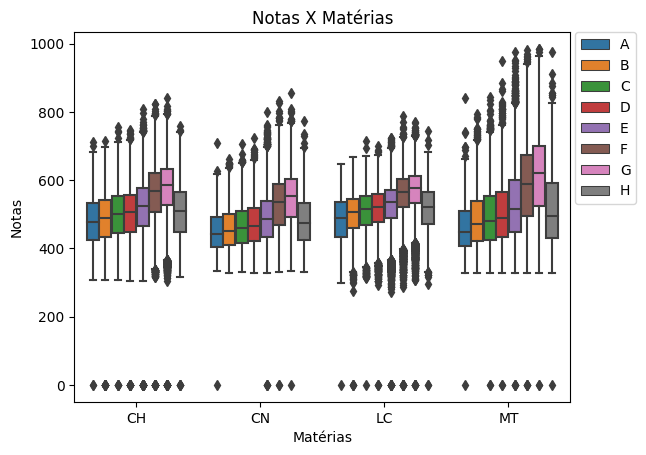

In [ ]:
sns.boxplot(data = cn_ch_lc_mt, x ="Materia" , y = "Nota", hue = "Numero", hue_order = ["A", "B", "C", "D", "E", "F", "G", "H"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title("Notas X Matérias")
plt.xlabel("Matérias")
plt.ylabel("Notas")

In [ ]:
cn_ch_lc_mt.groupby(["Numero", "Materia"]).mean()

Nota
Numero Materia            
A      CH       485.919318
       CN       463.827500
       LC       477.734091
       MT       464.250000
B      CH       500.609953
       CN       470.710169
       LC       495.966252
       MT       498.663729
C      CH       510.754974
       CN       476.199562
       LC       507.095692
       MT       504.067834
D      CH       511.100435
       CN       476.523452
       LC       510.668745
       MT       509.119814
E      CH       526.470368
       CN       493.226999
       LC       526.455694
       MT       533.828232
F      CH       562.521943
       CN       530.577722
       LC       558.002313
       MT       590.761923
G      CH       575.789724
       CN       545.328672
       LC       568.760660
       MT       613.376823
H      CH       512.781842
       CN       487.976816
       LC       511.325000
       MT       516.165363